In [1]:
#Importing all libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
os.chdir("C:\\Users\\chint\\Downloads\\mulispectral image\\")

In [2]:
#Importing the data
data=pd.read_csv("hour.csv")

In [3]:
data.shape

(17379, 17)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
index         17379 non-null int64
date          17379 non-null object
season        17379 non-null int64
year          17379 non-null int64
month         17379 non-null int64
hour          17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weather       17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
humidity      17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
demand        17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
data.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
# finding the categorical and numerical columns from data
numCols = data.select_dtypes("number").columns
catCols = data.select_dtypes("object").columns
numCols= list(set(numCols))
catCols= list(set(catCols))
print(numCols)
print(catCols)

['temp', 'atemp', 'index', 'month', 'season', 'workingday', 'year', 'windspeed', 'demand', 'weather', 'humidity', 'registered', 'holiday', 'hour', 'weekday', 'casual']
['date']


In [7]:
# Creating a copy of the data
data_prep=data.copy()

In [8]:
# dropping irrelevant columns
data_prep=data_prep.drop(['index','date','casual','registered'], axis=1)

In [9]:
# checking for missing values
data_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

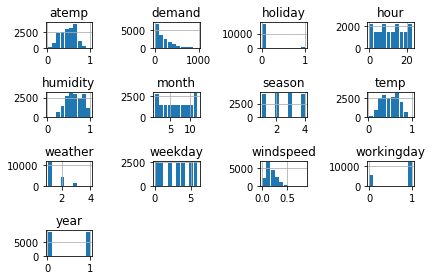

In [10]:
# visualization
data_prep.hist(rwidth=0.9)
plt.tight_layout()


# One important finding is demand is not normally distributed

In [11]:
# finding the categorical and numerical columns from data
numCols2 = data_prep.select_dtypes("number").columns
catCols2 = data_prep.select_dtypes("object").columns
numCols2= list(set(numCols2))
catCols2= list(set(catCols2))
print(numCols2)
print(catCols2)

['temp', 'atemp', 'month', 'season', 'workingday', 'year', 'windspeed', 'demand', 'weather', 'humidity', 'holiday', 'hour', 'weekday']
[]


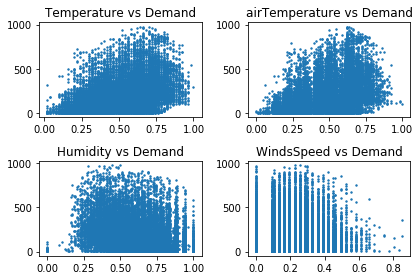

In [12]:
#Visualize the continous variables vs demand
plt.subplot(2,2,1)
plt.title("Temperature vs Demand")
plt.scatter(data_prep['temp'],data['demand'], s=2)

plt.subplot(2,2,2)
plt.title("airTemperature vs Demand")
plt.scatter(data_prep['atemp'],data['demand'], s=2)

plt.subplot(2,2,3)
plt.title("Humidity vs Demand")
plt.scatter(data_prep['humidity'],data['demand'], s=2)

plt.subplot(2,2,4)
plt.title("WindsSpeed vs Demand")
plt.scatter(data_prep['windspeed'],data['demand'], s=2)

plt.tight_layout()


<BarContainer object of 4 artists>

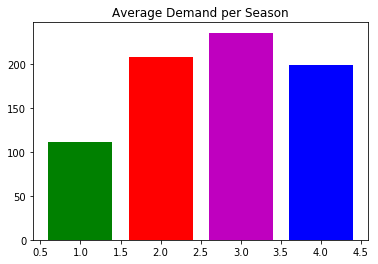

In [30]:
#Visualize the categorical variables vs demand
colors = ['g', 'r', 'm', 'b']

plt.title('Average Demand per Season')
cat_list = data_prep['season'].unique()
cat_average = data_prep.groupby('season').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

<BarContainer object of 12 artists>

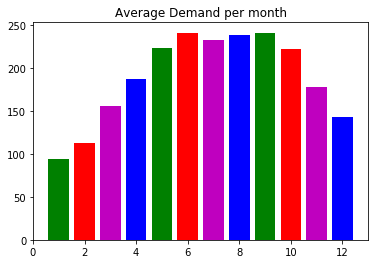

In [24]:
plt.title('Average Demand per month')
cat_list = data_prep['month'].unique()
cat_average = data_prep.groupby('month').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

<BarContainer object of 2 artists>

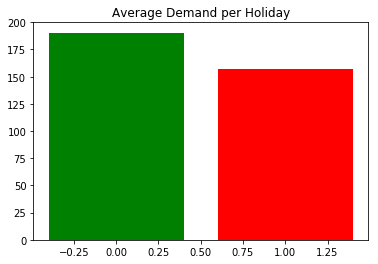

In [25]:
plt.title('Average Demand per Holiday')
cat_list = data_prep['holiday'].unique()
cat_average = data_prep.groupby('holiday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)


<BarContainer object of 24 artists>

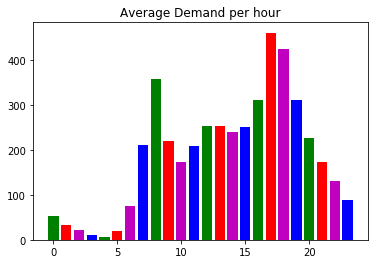

In [22]:
#Features to be dropped - weekday, year and workingday after considering the plots
plt.title('Average Demand per hour')
cat_list = data_prep['hour'].unique()
cat_average = data_prep.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)



<BarContainer object of 7 artists>

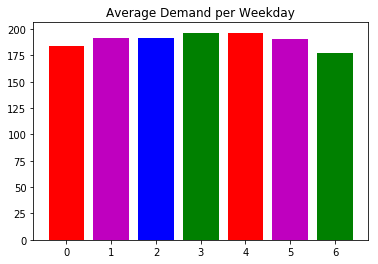

In [26]:
plt.title('Average Demand per Weekday')
cat_list = data_prep['weekday'].unique()
cat_average = data_prep.groupby('weekday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)


<BarContainer object of 2 artists>

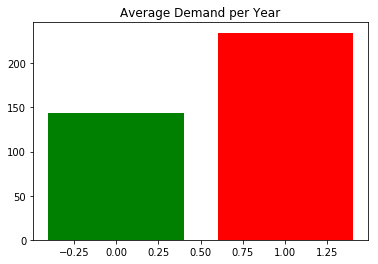

In [28]:
plt.title('Average Demand per Year')
cat_list = data_prep['year'].unique()
cat_average = data_prep.groupby('year').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

<BarContainer object of 2 artists>

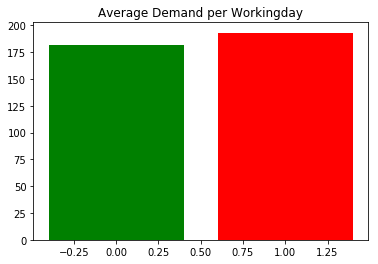

In [29]:
plt.title('Average Demand per Workingday')
cat_list = data_prep['workingday'].unique()
cat_average = data_prep.groupby('workingday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

<BarContainer object of 4 artists>

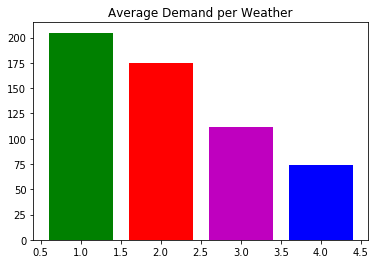

In [32]:
plt.title('Average Demand per Weather')
cat_list = data_prep['weather'].unique()
cat_average = data_prep.groupby('weather').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

In [33]:
#Features to be dropped - weekday, year and workingday after considering the plot
# Demand is not normally distributed, need to do log transformation
# Temperature and demand appears to have direct correlation
# the plot for temprature and air-temperature are almost identical
# no significant change in demand due to weekday and workingday

In [35]:
# Check for outliers
data_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [37]:
data_prep['demand'].quantile([0.05,0,1,0.15,0.9,0.95,0.99])

0.05      5.00
0.00      1.00
1.00    977.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

# checking multiple linear regression assumptions

In [40]:
# checking linearity using correlation coefficient matrix
correlation= data_prep[['temp','atemp','windspeed','demand']].corr()
print(correlation)

               temp     atemp  windspeed    demand
temp       1.000000  0.987672  -0.023125  0.404772
atemp      0.987672  1.000000  -0.062336  0.400929
windspeed -0.023125 -0.062336   1.000000  0.093234
demand     0.404772  0.400929   0.093234  1.000000


In [41]:
data_prep=data_prep.drop(['weekday', 'year', 'workingday', 'atemp', 'windspeed'],axis=1)

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474708, 0.4704955 , 0.49622798, 0.49404052, 0.4679593 ,
        0.47732034, 0.52675766, 0.59145737, 0.6520156 , 0.7151954 ,
        0.80591017, 0.92530966, 1.        , 0.92530966, 0.80591017,
        0.7151954 , 0.6520156 , 0.59145737, 0.52675766, 0.47732034,
        0.4679593 , 0.49404052, 0.49622798, 0.4704955 , 0.45474708],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x282f06c3e10>)

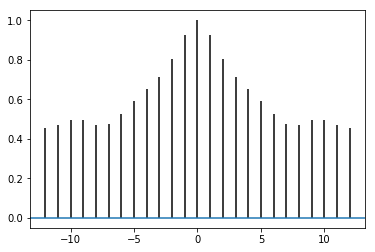

In [42]:
# Autocorrelation of demand using acor
dff1 = pd.to_numeric(data_prep['demand'], downcast='float')
plt.acorr(dff1, maxlags=12)

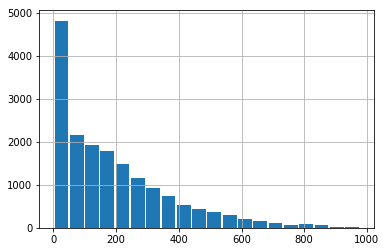

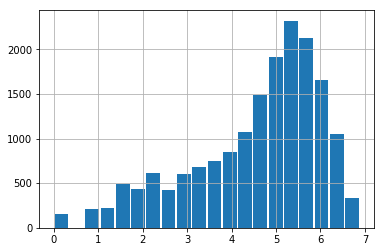

In [44]:
# Log Normalise the feature 'Demand'
df1 = data_prep['demand']
df2 = np.log(df1)

plt.figure()
df1.hist(rwidth=0.9, bins=20)

plt.figure()
df2.hist(rwidth=0.9, bins=20)

data_prep['demand'] = np.log(data_prep['demand'])

In [45]:
# Solve the problem of Autocorrelation
# Shift the demand by 3 lags

t_1 = data_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = data_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = data_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

data_prep_lag = pd.concat([data_prep, t_1, t_2, t_3], axis=1)

data_prep_lag = data_prep_lag.dropna()

In [47]:
#Create Dummy Variables and drop first to avoid dummy variables trap
data_prep_lag.dtypes

data_prep_lag['season'] = data_prep_lag['season'].astype('category')
data_prep_lag['holiday'] = data_prep_lag['holiday'].astype('category')
data_prep_lag['weather'] = data_prep_lag['weather'].astype('category')
data_prep_lag['month'] = data_prep_lag['month'].astype('category')
data_prep_lag['hour'] = data_prep_lag['hour'].astype('category')

data_prep_lag = pd.get_dummies(data_prep_lag, drop_first=True)

In [50]:
# Train test split
import math
Y = data_prep_lag[['demand']]
X = data_prep_lag.drop(['demand'], axis=1)

tr_size = 0.7 * len(X)
tr_size = int(tr_size)

X_train = X.values[0 : tr_size]
X_test = X.values[tr_size : len(X)]

Y_train = Y.values[0 : tr_size]
Y_test = Y.values[tr_size : len(Y)]


# Linear Regression
from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()
std_reg.fit(X_train, Y_train)

r2_train = std_reg.score(X_train, Y_train)
r2_test  = std_reg.score(X_test, Y_test)


# Create Y Predictions
Y_predict = std_reg.predict(X_test)


from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(Y_test, Y_predict))
print(rmse)

0.3809880049817044
